<module 'preprocessing' from '/home/tonko22/PycharmProjects/npo_classification/preprocessing.py'>

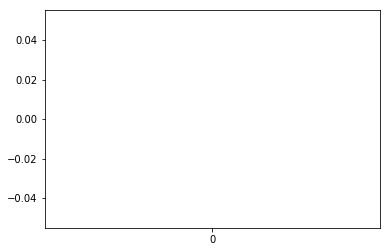

In [361]:
import pandas as pd
import parser
import imp
import preprocessing
import nltk
import imp
import numpy as np

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 100
imp.reload(parser)
imp.reload(preprocessing)
#nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger_ru')
# nltk.download('stopwords')

In [359]:
!git commit -a -m "minor fix"

[master 93bed6c] minor fix
 2 files changed, 38 insertions(+), 217 deletions(-)


In [303]:
df = pd.read_pickle("np_ngo_classification_links.pkl")
print(len(df))
df

195


,Регион,Название организации,ИНН,Год регистрации,Адресс,Возможность пожертвовать деньги на сайте,Возможность обратиться за помощью,Ссылка на сайт,Вид деятельности 1,Вид деятельности 2,...,Вид деятельности 5,Вид деятельности 6,Вид деятельности 7,Вид деятельности 8,Вид деятельности 9,Вид деятельности 10,Вид деятельности 11,Вид деятельности 12,num_sites,web_text
0,Москва,"Межрегиональная общественная благотворительная организация ""Общество защиты прав потребителей и ...",5032173157,2007-07-12,"г Москва, Орехово-Борисово Южное р-н, МКАД 23-й км, д 6",0,0,http://greenstartup.ru/,3_2,6_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,[function set_cookie(){var now = new Date();var time = now.getTime();time += 19360000 * 1000;now...
1,Москва,"Межрегиональная благотворительная общественная организация инвалидов ""Общество пациентов с перви...",7702370774,2007-08-28,"г Москва, Мещанский р-н, ул Трифоновская, д 49, оф 41",1,1,http://oppid.ru/,2_1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html PUBLIC ""-//W3C//DTD XHTML 1.0 Transitional//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-tr..."
3,Москва,"Российский общественный благотворительный фонд ветеранов (пенсионеров) войны, труда и Вооруженны...",7704058560,1998-06-05,"г Москва, р-н Соколиная Гора, ул Щербаковская, д 50/52",1,1,http://www.rbfondveteranov.ru/,1_4,5_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html PUBLIC ""-//W3C//DTD XHTML 1.0 Strict//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.d..."
4,Москва,"Благотворительный фонд поддержки и реализации программ в сфере культуры ""АВС""",7704278848,2011-09-30,"г Москва, р-н Хамовники, пер Знаменский Б., д 13 стр 2",0,0,http://www.avccharity.com/,4_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html, [if IE]><script src=""http://html5shiv.googlecode.com/svn/trunk/html5.js""></script><![endi..."
5,Москва,"Благотворительный фонд ""Фонд Валерия Гергиева""",7709402778,2003-01-27,"г Москва, р-н Арбат, ул Молчановка Б., д 23 к 2",0,0,http://gergiev-charity.com/rus/,4_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[HTML PUBLIC ""-//W3C//DTD HTML 4.01 Transitional//EN"" ""http://www.w3.org/TR/html4/loose.dtd"", Бл..."
6,Москва,Международный Благотворительный Фонд Владимира Спивакова,7710012370,1994-05-20,"г Москва, Пресненский р-н, Шведский тупик, д 3, оф 17",1,0,http://spivakov.ru/fund/contacts/,4_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[HTML, Контактная информация и реквизиты | Фонд Спивакова, [if lt IE 9]>\r\n<script src=""http://..."
8,Москва,"Благотворительный фонд помощи бездомным животным ""Ковчег""",7716451494,2014-11-14,"г Москва, Ярославский р-н, Ярославское шоссе, д 2 к 1, кв 157",1,0,http://fond-kovcheg.ru,6_4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html, Фонд «Ковчег» | Поможем вместе, window._wpemojiSettings = {""baseUrl"":""http:\/\/s.w.org\/i..."
9,Москва,Благотворительный фонд поддержки детей имени императрицы Александры Федоровны Романовой,7701064809,2011-03-22,"105082, ГОРОД МОСКВА, УЛИЦА ФРИДРИХА ЭНГЕЛЬСА, 75, СТР. 3, ОФ. № 1",1,1,http://www.vfonde.ru/,1_7,1_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html PUBLIC ""-//W3C//DTD XHTML 1.1//EN"" ""http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd"", Áëàãîòâ..."
10,Москва,"Благотворительный Фонд ""Центр помощи беспризорным детям"" Торгово-промышленной палаты Российской ...",7701295193,2002-03-27,"101000, ГОРОД МОСКВА, БУЛЬВАР ЧИСТОПРУДНЫЙ, 5/10, С.1",1,1,http://www.tppdetfond.ru/,1_3,1_7,...,2_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html, if(!window.BX)window.BX={};if(!window.BX.message)window.BX.message=function(mess){if(type..."
11,Москва,"Некоммерческая благотворительная организация ""Благотворительный фонд В. Потанина""",7702231587,1999-01-10,"119180, ГОРОД МОСКВА, УЛИЦА ЯКИМАНКА Б., 9, 316",0,0,http://www.kmfond.ru/,4_2,4_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[html, Фонд ""Кузнецкий Мост"" - Главная, window.addEvent('load', function() {\n\t\t\t\tnew JCapti..."


In [304]:
df["raw_text"] =  df["web_text"].apply(lambda x: " ".join(x))

In [308]:
pp = preprocessing.PreprocessingInterface()

INFO pymorphy2.opencorpora_dict.wrapper __init__ Loading dictionaries from /home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/pymorphy2_dicts/data
INFO pymorphy2.opencorpora_dict.wrapper __init__ format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [306]:
pp = preprocessing.PreprocessingInterface()
df["text_normalized"] = df["raw_text"].apply(pp.normalize)
df["text_padded"] = df["text_normalized"].apply(pp.pad_punctuation)
df["tokenized"] = df["text_padded"].apply(pp.razdel_tokenize)
df["no_punct"] = df["tokenized"].apply(pp.remove_punct)
df["text_no_stop"] = df["no_punct"].apply(pp.remove_stopwords)
df["preprocessed_tokens"] = df["text_no_stop"].apply(pp.remove_digits)

INFO pymorphy2.opencorpora_dict.wrapper __init__ Loading dictionaries from /home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/pymorphy2_dicts/data
INFO pymorphy2.opencorpora_dict.wrapper __init__ format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [316]:
df["cyrillic_text"] = df["preprocessed_tokens"].apply(pp.filter_non_cyrillic)
df = df[df['cyrillic_text'].astype(str) != '[]']
df.dropna(subset=["cyrillic_text"], inplace=True)

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [318]:
df["cyrillic_text"]

1      [оппид, общество, пациентов, первичным, иммунодефицитом, рус, англ, главная, цели, информационны...
3      [москва, щербаковская, ул, главная, персоналии, российскому, фонду, ветеранов, лет, акции, росси...
4      [перейти, основному, содержанию, фонде, проекты, выставки, издания, музыка, контакты, рус, фонд,...
5      [благотворительный, фонд, фонд, валерия, гергиева, благотворительный, фонд, фонд, валерия, герги...
6      [контактная, информация, реквизиты, фонд, спивакова, вконтакте, фонде, сделать, пожертвование, ф...
8      [фонд, ковчег, поможем, вместе, вход, регистрация, помочь, меню, новости, животные, проекты, ист...
9      [г, р, ш, е, ч, н, т, б, ы, л, п, л, ч, е, н, л, е, ч, е, н, е, б, р, н, р, б, т, р, ш, н, т, р,...
10     [загрузка, данных, закрыть, развернуть, свернуть, окно, сохранить, отменить, продолжить, ч, м, с...
11     [фонд, кузнецкий, мост, главная, открыт, закрыто, показать, информацию, скрыть, информацию, разм...
12     [фонд, михаила, рудяка, истори

In [319]:
df.drop([9, 26, 57, 61, 67, 80], inplace=True)

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [320]:
df["lemmatized"] = df["cyrillic_text"].apply(pp.lemmatize_tokens_with_mystem)
df["lemmatized"].replace('', np.nan, inplace=True)
df["preprocessed_text"] = df["lemmatized"].apply(" ".join)
df.dropna(subset=["preprocessed_text"], inplace=True)
df = df[df['preprocessed_text'].astype(str) != '[]']

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [329]:
df = df.reset_index().drop("index", axis=1)

In [330]:
# df.dropna(subset=["preprocessed_tokens"], inplace=True)
pp.stats_for_series(df["preprocessed_text"])

,Total tokens,Unique tokens,Total texts,Empty texts,Empty tokens
Count,787333,164,184,0,0


In [331]:
df[["preprocessed_text", 
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
  ]].to_pickle("preprocessed_dataset.pkl")

In [332]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [335]:
def extract_lv_1(category_string):
    if  isinstance(category_string, str):
        return category_string[0]

In [336]:
# Extracting only lvl 1 categories
target_cols = [
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
]
for each in target_cols:
    df[each] = df[each].apply(extract_lv_1)

In [337]:
X = df["preprocessed_text"]
y = pd.get_dummies(df[[
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [343]:
y.shape

(184, 38)

In [356]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    ngram_range=(1, 2),
    max_features=1000)
word_vectorizer.fit(X)

train_word = word_vectorizer.transform(X_train)
test_word = word_vectorizer.transform(X_test)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='char',
    ngram_range=(2, 6),
    max_features=1000)
char_vectorizer.fit(X)

train_char = char_vectorizer.transform(X_train)
test_char = char_vectorizer.transform(X_test)

from scipy.sparse import hstack
train_features = hstack([train_word, train_char])
test_features = hstack([test_word, test_char])

In [357]:
train_features.shape

(123, 2000)

In [358]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

clf = KNeighborsClassifier()
k_range = np.arange(1,10)
weight_options = ["uniform", "distance"]
metrics = ['minkowski','euclidean','manhattan']
param_grid = dict(n_neighbors = k_range, weights = weight_options, metric=metrics)
grid = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy") 
grid.fit(train_features, y_train) 
print(grid.best_score_) 
print(grid.best_params_)

0.43089430894308944
{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}


In [267]:
from sklearn.multiclass import OneVsRestClassifier

In [216]:
def evaluate(clf, test_features, y_test, proba=False):
    if proba:
        y_pred = clf.predict_proba(test_features)
    else:
        y_pred = clf.predict(test_features)
    return accuracy_score(y_test, y_pred, normalize=True), f1_score(y_test, y_pred, average="weighted")

In [ ]:
logreg = LogisticRegression()

In [278]:
def score_one_vs_rest(input_clf, proba=False):
    clf = OneVsRestClassifier(input_clf)
    clf.fit(train_features, y_train)
    evaluate(clf, test_features, y_test)
    if proba:
        y_pred = clf.predict_proba(test_features)
    else:
        y_pred = clf.predict(test_features)
    return accuracy_score(y_test, y_pred, normalize=True), f1_score(y_test, y_pred, average="weighted")

In [285]:
# score_one_vs_rest(KNeighborsClassifier(metric='minkowski', n_neighbors=1, weights='uniform'))
score_one_vs_rest(lgb.LGBMClassifier(silent=False, n_estimators=80, class_weight="balanced"))

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 9 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 17 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 42 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 56 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 65 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarni

(0.16393442622950818, 0.17321136465873307)

In [215]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV

In [230]:
scores = cross_val_score(clf, test_features, y_test, cv=10, scoring='accuracy')
np.mean(scores)

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.08333333333333333

In [269]:
clf = KNeighborsClassifier()
clf.fit(train_features, y_train)
evaluate(clf, test_features, y_test)
y_pred = clf.predict(test_features)
accuracy_score(y_test, y_pred, normalize=True)

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.13114754098360656

In [237]:
!git commit -a -m "preprocessing done, 0.30 KNN"

[master 3e0ebec] preprocessing done, 0.30 KNN
 2 files changed, 8702 insertions(+), 17115 deletions(-)
 rewrite preprocessing_and_baseline_modeling.ipynb (64%)


In [ ]:
train_features

In [246]:
lgb.LGBMClassifier.fit?

In [284]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(silent=False, n_estimators=80, class_weight="balanced")
lgb_clf.fit(train_features, y_train)

ValueError: bad input shape (123, 84)

In [ ]:
lgb_clf.fit(train_features, y_train, eval_set=[(test_features, y_train)], verbose=True, categorical_feature=[0,1,2,3])

In [283]:
import pprint

def report(clf, test_features, y_test):
    y_pred = clf.predict(test_features)
    return classification_report(y_test, y_pred)

pprint.pprint(report(clf, test_features, y_test))

('             precision    recall  f1-score   support\n'
 '\n'
 '          0       0.00      0.00      0.00         1\n'
 '          1       0.00      0.00      0.00         4\n'
 '          2       0.60      0.30      0.40        10\n'
 '          3       0.00      0.00      0.00         0\n'
 '          4       0.00      0.00      0.00         0\n'
 '          5       0.00      0.00      0.00         0\n'
 '          6       1.00      0.23      0.38        13\n'
 '          7       0.00      0.00      0.00        13\n'
 '          8       0.00      0.00      0.00         6\n'
 '          9       0.00      0.00      0.00         1\n'
 '         10       0.00      0.00      0.00         0\n'
 '         11       0.00      0.00      0.00         0\n'
 '         12       0.00      0.00      0.00         3\n'
 '         13       0.00      0.00      0.00         0\n'
 '         14       0.00      0.00      0.00         1\n'
 '         15       1.00      0.83      0.91         6\n'
 '      

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [292]:
!git commit -a -m "preprocessed web page dataset with labes"

[master 5aa45c5] preprocessed web page dataset with labes
 2 files changed, 60 insertions(+)
 create mode 100644 preprocessed_dataset.pkl


In [293]:
!git push

Git 2.0 from 'matching' to 'simple'. To squelch this message
and maintain the traditional behavior, use:

  git config --global push.default matching

To squelch this message and adopt the new behavior now, use:

  git config --global push.default simple

When push.default is set to 'matching', git will push local branches
to the remote branches that already exist with the same name.

Since Git 2.0, Git defaults to the more conservative 'simple'
behavior, which only pushes the current branch to the corresponding
remote branch that 'git pull' uses to update the current branch.

See 'git help config' and search for 'push.default' for further information.
(the 'simple' mode was introduced in Git 1.7.11. Use the similar mode
'current' instead of 'simple' if you sometimes use older versions of Git)

Username for 'https://github.com': ^C
